In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
import pandas as pd
import numpy as np

# Load the DataSet

In [5]:
df=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
df.columns=['TweetID','entity','sentiment','Tweet content']
df.head()

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Basic EDA

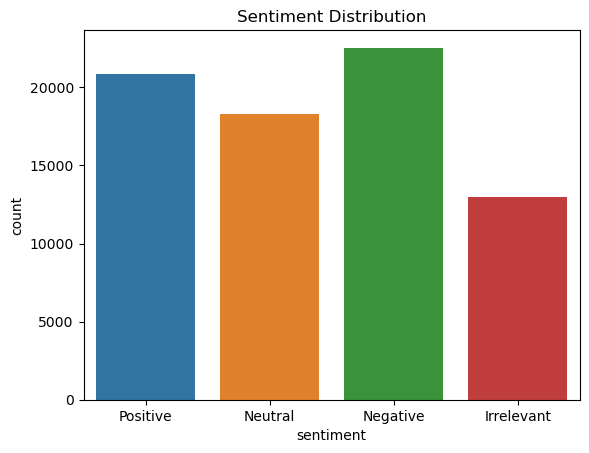

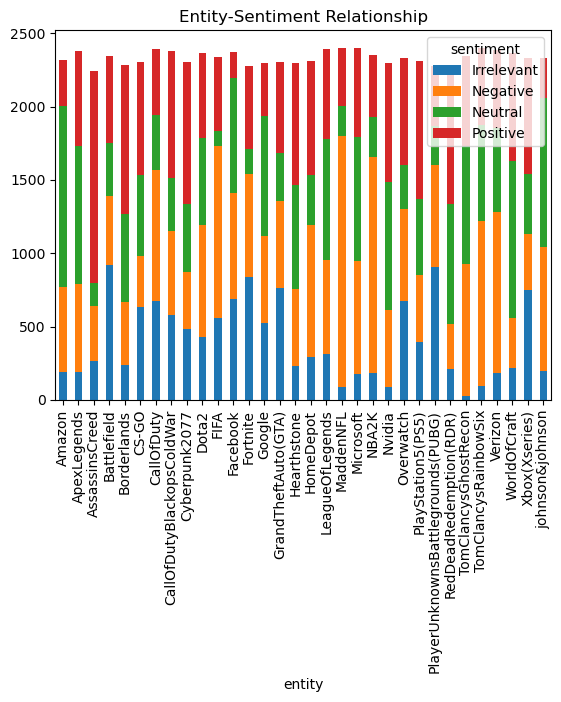

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Entity and sentiment relationship
entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Entity-Sentiment Relationship')
plt.show()


# Wordcloud for different Sentiment

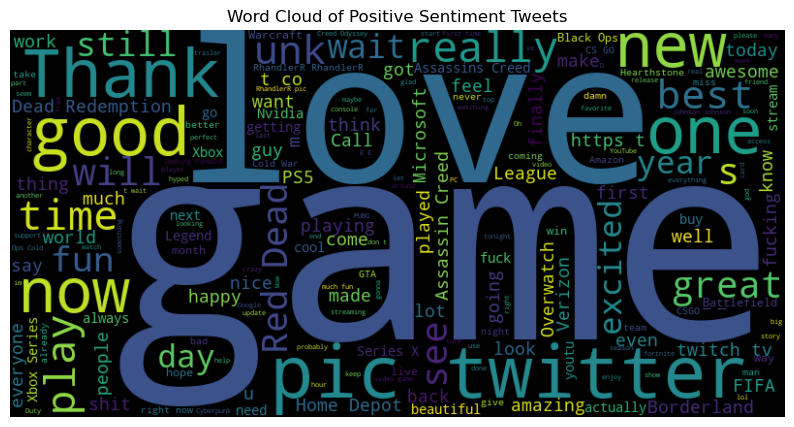

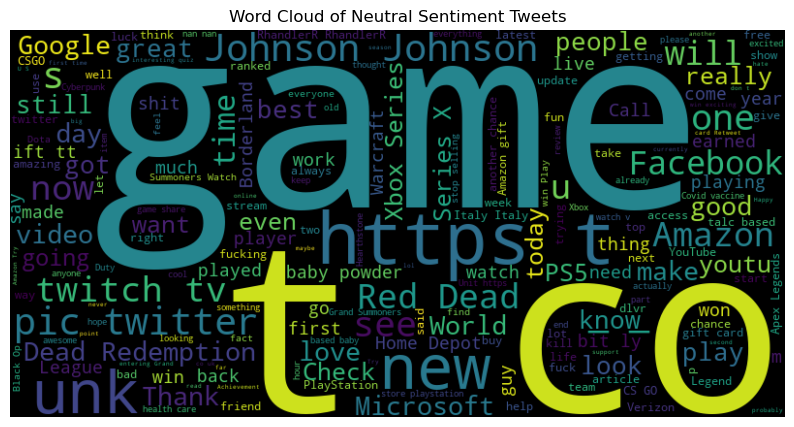

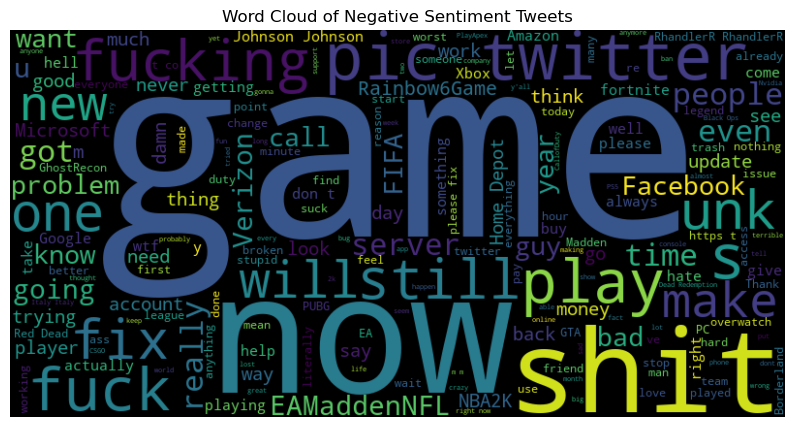

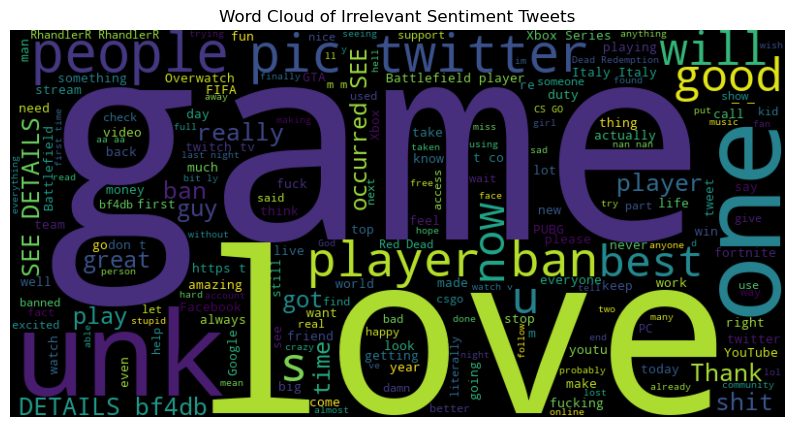

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment):
    # Filter tweets of the specified sentiment and extract the 'Tweet content' column
    tweets = df[df["sentiment"] == sentiment]["Tweet content"]
    
    # Convert the tweets to strings
    tweets = tweets.astype(str)
    
    # Join all the tweets into a single string
    text = ' '.join(tweets)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {sentiment} Sentiment Tweets')
    plt.show()

# Iterate over the unique sentiments in the DataFrame
sentiments = df['sentiment'].unique()
for sentiment in sentiments:
    generate_wordcloud(sentiment)


# Wordcloud for different Entities

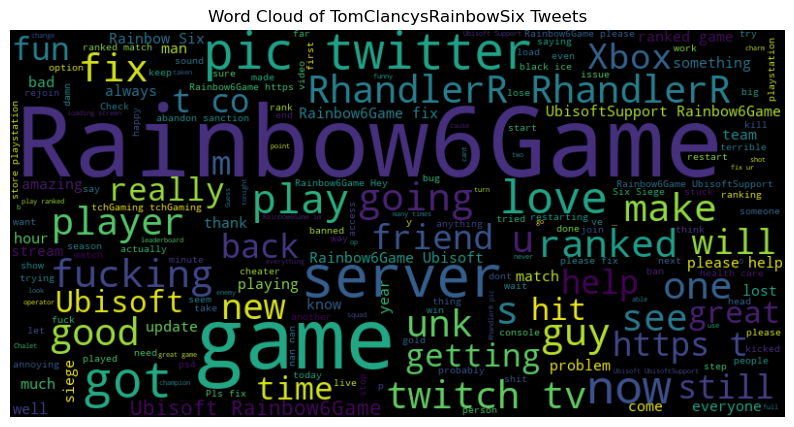

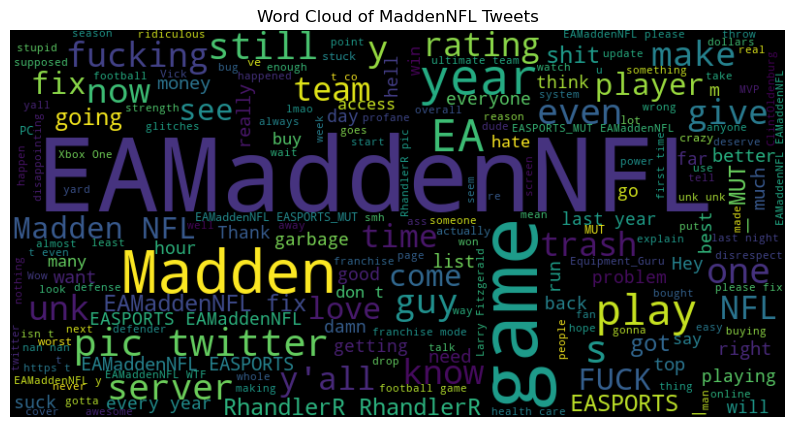

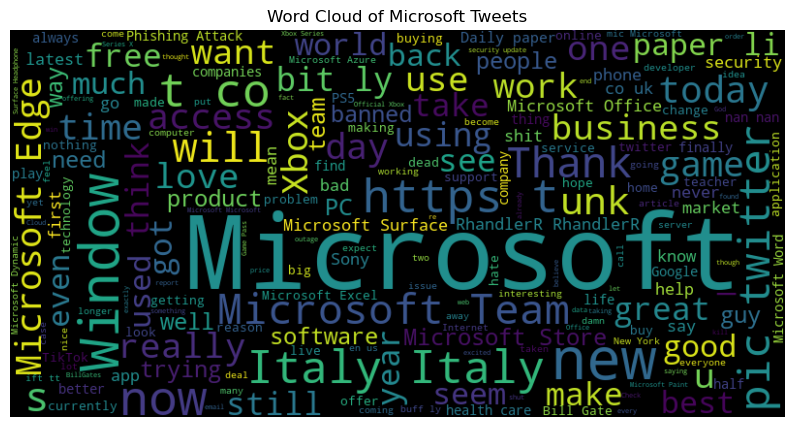

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate the counts of each entity
entity_counts = df['entity'].value_counts()

# Select the top three entities with the highest counts
top_entities = entity_counts.head(3).index.tolist()

# Iterate over the top entities and generate word clouds
for entity in top_entities:
    # Filter tweets associated with the current entity and extract the 'Tweet content' column
    tweets = df[df['entity'] == entity]['Tweet content']
    
    # Convert the tweets to strings
    tweets = tweets.astype(str)
    
    # Join all the tweets into a single string
    text = ' '.join(tweets)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {entity} Tweets')
    plt.show()


# Data preprocessing & Tokenization

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'Tweet content' column
df['Tweet content']=df['Tweet content'].astype('str')
df['clean_text'] = df['Tweet content'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Model training & evaluation

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train a Support Vector Machine (SVM) classifier
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = svm.predict(X_val_vec)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:')
print(report)


Accuracy: 0.8382540001338957
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.87      0.77      0.82      2661
    Negative       0.86      0.88      0.87      4471
     Neutral       0.85      0.80      0.83      3551
    Positive       0.79      0.87      0.83      4254

    accuracy                           0.84     14937
   macro avg       0.84      0.83      0.84     14937
weighted avg       0.84      0.84      0.84     14937



# Validation

In [35]:
# Load the validation dataset
validation_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')

validation_df.columns=['TweetID','entity','sentiment','Tweet content']

In [54]:
# Preprocess the text data in the validation dataset
validation_df['clean_text'] = validation_df['Tweet content'].apply(preprocess_text)

# Vectorize the text data
X_val_data = vectorizer.transform(validation_df['clean_text'])

# Make predictions on the validation data
y_val_pred = svm.predict(X_val_data)

# save the predicted sentiments
predictions_df = pd.DataFrame({'Predicted Sentiment': y_val_pred})
predictions_df.to_csv('predicted_sentiments.csv', index=False)

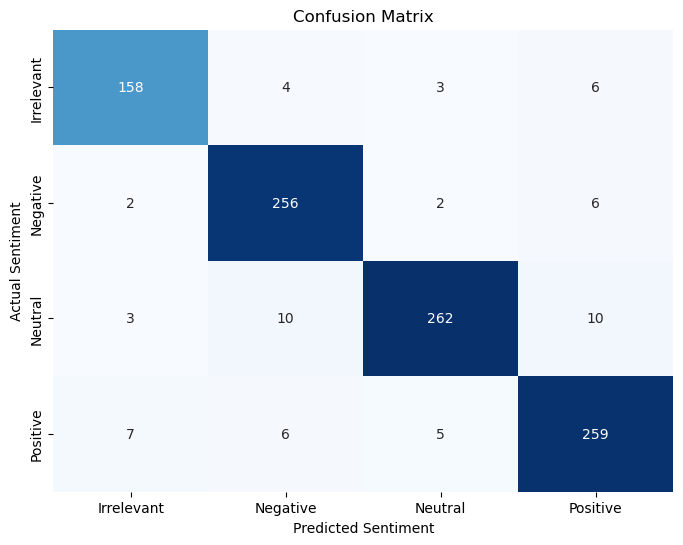

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.93      0.92      0.93       171
    Negative       0.93      0.96      0.94       266
     Neutral       0.96      0.92      0.94       285
    Positive       0.92      0.94      0.93       277

    accuracy                           0.94       999
   macro avg       0.94      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999



In [53]:

from sklearn.preprocessing import LabelEncoder

# Define the LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the sentiment labels in the training data
label_encoder.fit(df['sentiment'])
from sklearn.metrics import confusion_matrix, classification_report

actual_sentiments=validation_df['sentiment']
predicted_sentiments=y_val_pred
# Create a confusion matrix
confusion = confusion_matrix(actual_sentiments, predicted_sentiments)

# Create a classification report
classification = classification_report(actual_sentiments, predicted_sentiments)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", classification)